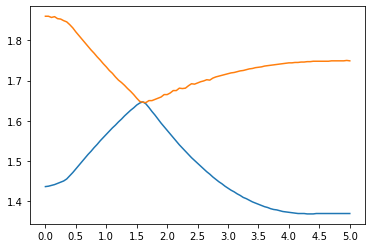

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
m1 = 578.7 # gram
m2 = 912.8 # gram
data = np.loadtxt('forsok_23.txt', skiprows = 7)
tid = data[:,0]
pos1 = data[:,1]
pos2 = data[:,4]

plt.plot(tid, pos1)
plt.plot(tid, -(pos2)+2.796)
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]);

In [2]:
for i in range(0,100):
    if pos1[i+1] < pos1[i] > pos1[i-1]:
        print(i)
    else:
        continue
        
for i in range(0,100):
    if pos2[i+1] < pos2[i] > pos2[i-1]:
        print(i)
    else:
        continue

32
2
33
45
49
54


In [3]:
pos2[32]+pos1[32]

2.7969999999999997

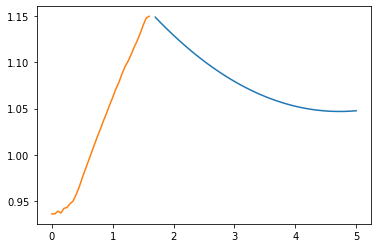

67

In [4]:
y_data = pos2[34:]
x_data = tid[34:]

def funksjon(x, a, b, c, d):
    return a * x**3 + b*x**2 + c*x + d

#plt.plot(x_data, y_data, "xb")

popt, pcov = curve_fit(funksjon, x_data, y_data)

xverdier = np.linspace(tid[34], tid[len(tid)-1], len(pos2)-len(pos2[:34]))
yverdier = funksjon(xverdier, *popt)

plt.plot(xverdier, yverdier)
plt.plot(tid[:33], pos2[:33])
plt.show()             
len(xverdier)

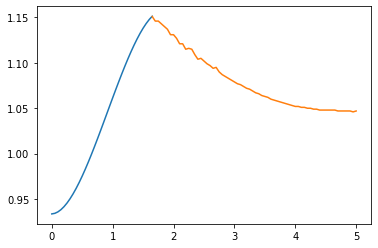

34

In [5]:
y_data_2 = pos2[:34]
x_data_2 = tid[:34]

def funksjon(x, a, b, c, d):
    return a * x**3 + b*x**2 + c*x + d

#plt.plot(x_data_2, y_data_2, "xb")

popt, pcov = curve_fit(funksjon, x_data_2, y_data_2)

xverdier_2 = np.linspace(tid[0], tid[33], len(pos2[:34]))
yverdier_2 = funksjon(xverdier_2, *popt)

plt.plot(xverdier_2, yverdier_2)
plt.plot(tid[33:], pos2[33:])
plt.show()             
len(xverdier_2)

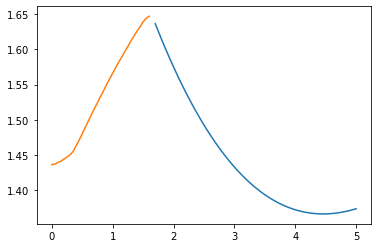

In [6]:
y_data_1 = pos1[34:]
x_data_1 = tid[34:]

#plt.plot(x_data_1, y_data_1, "xb")

popt, pcov = curve_fit(funksjon, x_data_1, y_data_1)

xverdier_1 = np.linspace(tid[34], tid[len(tid)-1], len(pos1)-len(pos1[:34]))
yverdier_1 = funksjon(xverdier_1, *popt)

plt.plot(xverdier_1, yverdier_1)
plt.plot(tid[:33], pos1[:33])
plt.show()  

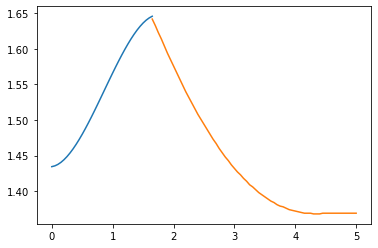

In [7]:
y_data_3 = pos1[:34]
x_data_3 = tid[:34]

#plt.plot(x_data_3, y_data_3, "xb")

popt, pcov = curve_fit(funksjon, x_data_3, y_data_3)

xverdier_3 = np.linspace(tid[0], tid[33], len(pos1[:34]))
yverdier_3 = funksjon(xverdier_3, *popt)

plt.plot(xverdier_3, yverdier_3)
plt.plot(tid[33:], pos1[33:])
plt.show() 

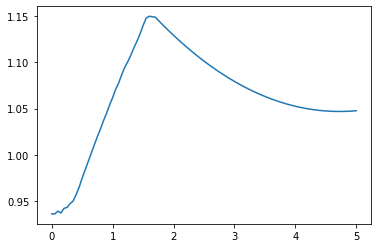

In [8]:
plot_x = []
plot_y = []

plot_x.extend(tid[:33])
plot_x.extend(xverdier)
plot_y.extend(pos2[:33])
plot_y.extend(yverdier)

plt.plot(plot_x, plot_y);

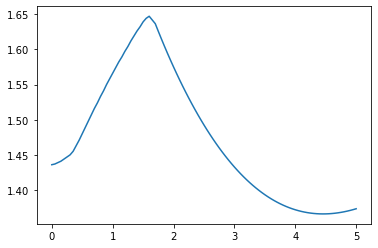

In [9]:
plot_x_1 = []
plot_y_1 = []

plot_x_1.extend(tid[:33])
plot_x_1.extend(xverdier_1)
plot_y_1.extend(pos1[:33])
plot_y_1.extend(yverdier_1)

plt.plot(plot_x_1, plot_y_1);

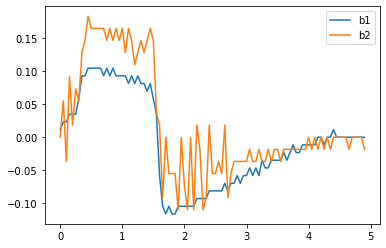

In [10]:
fart1 = []
fart2 = []

for i in range(0,len(plot_y)-1):
    fart = (pos1[i+1]-pos1[i])/(tid[i+1]-tid[i])
    fart1.append(fart)
for i in range(0,len(plot_y)-1):
    fart = (pos2[i+1]-pos2[i])/(tid[i+1]-tid[i])
    fart2.append(fart)
    
b1 = np.array(fart1)*(m1/1000)
b2 = np.array(fart2)*(m2/1000)
plt.plot(tid[:99], b1, label = 'b1')
plt.plot(tid[:99], b2, label = 'b2')
plt.legend();

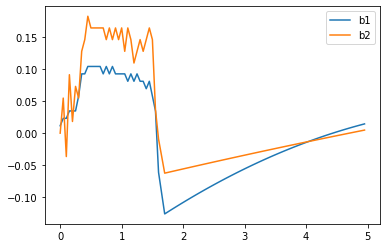

In [11]:
fart1 = []
fart2 = []

for i in range(0,len(plot_y)-1):
    fart = (plot_y_1[i+1]-plot_y_1[i])/(plot_x_1[i+1]-plot_x_1[i])
    fart1.append(fart)
for i in range(0,len(plot_y)-1):
    fart = (plot_y[i+1]-plot_y[i])/(plot_x[i+1]-plot_x[i])
    fart2.append(fart)


b1 = np.array(fart1)*(m1/1000)
b2 = np.array(fart2)*(m2/1000)
plt.plot(plot_x_1[:len(plot_x_1)-1], b1, label = 'b1')
plt.plot(plot_x[:len(plot_x)-1], b2, label = 'b2')
plt.legend();

ser at den krysser igjen før 5 sek, sikkert pågrunn av regresjonen vi har gjort

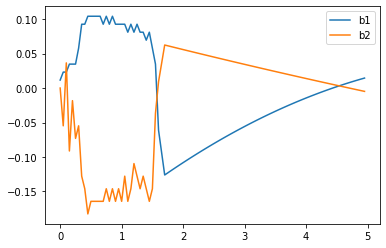

In [12]:
plt.plot(plot_x_1[:len(plot_x_1)-1], b1, label = 'b1')
plt.plot(plot_x[:len(plot_x)-1], -b2, label = 'b2')
plt.legend();

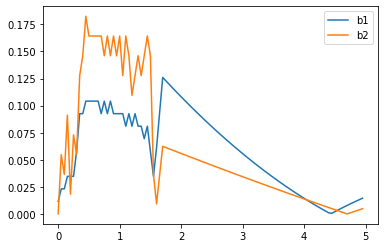

In [13]:
plt.plot(plot_x_1[:len(plot_x_1)-1], abs(b1), label = 'b1')
plt.plot(plot_x[:len(plot_x)-1], abs(b2), label = 'b2');
plt.legend();

In [14]:
plot_x = []
plot_y = []

plot_x.extend(xverdier_2)
plot_x.extend(xverdier)
plot_y.extend(yverdier_2)
plot_y.extend(yverdier)

In [15]:
plot_x_1 = []
plot_y_1 = []

plot_x_1.extend(xverdier_3)
plot_x_1.extend(xverdier_1)
plot_y_1.extend(yverdier_3)
plot_y_1.extend(yverdier_1)

In [16]:
fart1 = []
fart2 = []

for i in range(0,len(plot_y)-1):
    fart = (plot_y_1[i+1]-plot_y_1[i])/(plot_x_1[i+1]-plot_x_1[i])
    fart1.append(fart)
for i in range(0,len(plot_y)-1):
    fart = (plot_y[i+1]-plot_y[i])/(plot_x[i+1]-plot_x[i])
    fart2.append(fart)


b1 = np.array(fart1)*(m1/1000)
b2 = np.array(fart2)*(m2/1000)

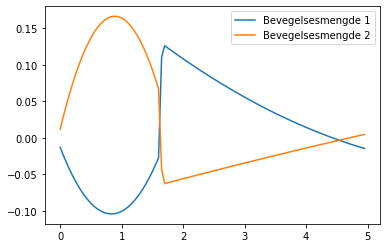

In [17]:
plt.plot(plot_x_1[:len(plot_x_1)-1], -(b1), label = "Bevegelsesmengde 1")
plt.plot(plot_x[:len(plot_x)-1], (b2), label = "Bevegelsesmengde 2")
plt.legend()

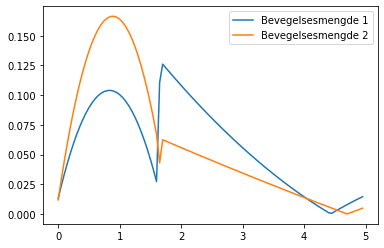

In [18]:
plt.plot(plot_x_1[:len(plot_x_1)-1], abs(b1), label = "Bevegelsesmengde 1")
plt.plot(plot_x[:len(plot_x)-1], abs(b2), label = "Bevegelsesmengde 2")
plt.legend()